In [1]:
import os
import pandas as pd
from pathlib import Path
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# Directory containing the NetCDF files
directory = r'E:\Southern Hemisphere'

# List all NetCDF files in the directory
file_names = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.nc')]

# Variables to read
variables = ['time', 'xgrid', 'ygrid', 'cdr_seaice_conc_monthly']

# Create an empty list to store the data arrays
data_arrays = list()

# Loop through the files
for file_name in file_names:
    # Read the file
    ds = xr.open_dataset(file_names[0])[variables]
    df = ds.to_dataframe().assign(filename=Path(file_name).stem)
    data_arrays.append(df)

In [3]:
df = pd.concat(data_arrays)
df

time      xgrid      ygrid  cdr_seaice_conc_monthly  \
tdim x   y                                                               
0    0   0   1978-11-01 -3937500.0  4337500.0                      0.0   
         1   1978-11-01 -3937500.0  4312500.0                      0.0   
         2   1978-11-01 -3937500.0  4287500.0                      0.0   
         3   1978-11-01 -3937500.0  4262500.0                      0.0   
         4   1978-11-01 -3937500.0  4237500.0                      0.0   
...                 ...        ...        ...                      ...   
     315 327 1978-11-01  3937500.0 -3837500.0                      0.0   
         328 1978-11-01  3937500.0 -3862500.0                      0.0   
         329 1978-11-01  3937500.0 -3887500.0                      0.0   
         330 1978-11-01  3937500.0 -3912500.0                      0.0   
         331 1978-11-01  3937500.0 -3937500.0                      0.0   

                                              filename  
tdim x   y                                              
0    0   0    seaice_conc_monthly_sh_197811_n07_v04r00  
         1    seaice_conc_monthly_sh_197811_n07_v04r00  
         2    seaice_conc_monthly_sh_197811_n07_v04r00  
         3    seaice_conc_monthly_sh_197811_n07_v04r00  
         4    seaice_conc_monthly_sh_197811_n07_v04r00  
...                                                ...  
     315 327  seaice_conc_monthly_sh_202212_f17_v04r00  
         328  seaice_conc_monthly_sh_202212_f17_v04r00  
         329  seaice_conc_monthly_sh_202212_f17_v04r00  
         330  seaice_conc_monthly_sh_202212_f17_v04r00  
         331  seaice_conc_monthly_sh_202212_f17_v04r00  

[55603360 rows x 5 columns]

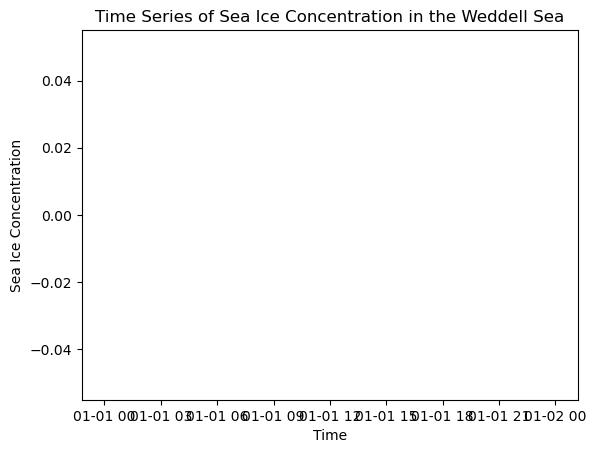

In [4]:
import matplotlib.pyplot as plt

# Specify the latitude and longitude range for the Weddell Sea
latitude_range = (-80, -60)
longitude_range = (-45, -5)

# Filter the DataFrame based on the latitude and longitude range
filtered_df = df[
    (df['xgrid'] >= longitude_range[0]) & (df['xgrid'] <= longitude_range[1]) &
    (df['ygrid'] >= latitude_range[0]) & (df['ygrid'] <= latitude_range[1])
]

# Extract the time and sea ice concentration data
time = filtered_df['time']
seaice_conc = filtered_df['cdr_seaice_conc_monthly']

# Plot the time series
plt.plot(time, seaice_conc)
plt.xlabel('Time')
plt.ylabel('Sea Ice Concentration')
plt.title('Time Series of Sea Ice Concentration in the Weddell Sea')
plt.show()

In [5]:
df['cdr_seaice_conc_monthly'].max()

2.5399999618530273